# ANÁLISIS DE LOS RESULTADOS

***
<code> **PROYECTO NOVELLA** </code>

En este *notebook* se pretende evaluar el rendimiento de nuestro modelo final (MLP) con los nuevos datos obtenidos. Asimismo, implementaremos un modelo que se base en una heurística concreta y compararemos tanto a nivel global como por segmentos los resultados con los de nuestro modelo final.

[Carga y preparación datos train y test](#Carga-y-preparación-datos-train-y-test)

[Recuperación de modelos de mlflow](#Recuperación-de-modelos-de-mlflow)

**Análisis**
* [Análisis balanced_accuracy](#Análisis-balanced_accuracy)
* [Análisis especificidad y sensibilidad](#Análisis-especificidad-y-sensibilidad)
* [Análisis por segmentos (géneros literarios)](#Análisis-por-segmentos-(géneros-literarios))
* [Análisis de las variables de cada modelo](#Análisis-de-las-variables-de-cada-modelo)

## Carga y preparación datos train y test

**Carga datos**

In [1]:
import pandas as pd

In [2]:
import os
import sys

# Añadimos la carpeta 'drive' al path
ruta_carpeta_drive = os.path.abspath('../drive')
if ruta_carpeta_drive not in sys.path:
    sys.path.insert(0, ruta_carpeta_drive)

import drive

In [3]:
# -- IMPORTAMOS FUNCIONES COMUNES --

from pathlib import Path

# Obtenemos la ruta al directorio del módulo utilidadesModelos.py
module_dir = Path("../modelos") 

# Agregamos temporalmente el directorio al sys.path solo para esta importación
sys.path.append(str(module_dir))

from utilidadesModelos import *

In [4]:
# Descargamos los datos en formato parquet de Google Drive
drive.descargar_archivos_concretos('datosEntrenamiento.parquet', '../drive')

Archivo datosEntrenamiento.parquet guardado en: ../data/clean/datosEntrenamiento.parquet


In [5]:
data = pd.read_parquet('../data/clean/datosEntrenamiento.parquet')

In [6]:
data

,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,...,Womens,Womens Fiction,World War I,World War II,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
0,0.0,329.0,1.0,0.51,0.40,0,19.99,1.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,269.0,2.0,0.61,0.54,1,3.99,2.0,ebook,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2335.0,1.0,0.72,0.57,1,20.99,7.0,ebook,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,40.0,1.0,0.83,0.35,0,25.00,1.0,hardcover,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,189.0,1.0,0.59,0.26,0,15.00,4.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,0.0,432.0,1.0,0.40,0.38,1,25.35,5.0,hardcover,100.0,...,0,0,0,0,0,0,0,0,0,0
3686,0.0,304.0,1.0,0.27,0.28,0,18.99,3.0,paperback,103.0,...,0,0,0,0,0,0,0,0,0,0
3687,0.0,160.0,1.0,0.10,0.16,0,15.39,5.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0
3688,0.0,304.0,1.0,0.51,0.43,0,25.19,3.0,hardcover,590.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
newData = df_test = pd.read_csv("test_FINAL_EVALUACION.csv", index_col = 0)

In [8]:
newData

,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,...,Womens,Womens Fiction,World War I,World War II,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
0,0.0,548.0,1.0,0.32,0.27,1,24.30,2.0,ebook,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,304.0,1.0,0.80,0.29,0,10.99,3.0,hardcover,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,352.0,1.0,0.39,0.35,0,18.00,3.0,paperback,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,336.0,1.0,0.13,0.13,1,17.99,2.0,paperback,0.0,...,0,0,0,0,1,0,1,0,0,0
4,0.0,232.0,1.0,0.87,0.20,1,13.99,2.0,hardcover,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,382.0,1.0,0.77,0.57,0,15.08,7.0,ebook,0.0,...,0,0,0,0,1,0,0,0,0,0
325,0.0,384.0,1.0,0.80,0.39,0,25.20,3.0,hardcover,0.0,...,0,0,0,0,0,0,0,0,0,0
326,0.0,464.0,5.0,0.09,0.25,1,13.49,2.0,paperback,270.0,...,0,0,0,0,1,0,0,0,0,0
327,0.0,368.0,1.0,0.58,0.49,1,27.00,5.0,hardcover,100.0,...,0,0,0,0,1,0,1,0,0,0


Separamos el conjunto de datos sin escalar en train y test

In [9]:
y, X = getYX(data)
X_train, X_test, y_train, y_test = separacionTrainTest(X, y)

In [10]:
X_test.head()

,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,...,Womens,Womens Fiction,World War I,World War II,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
2588,322.0,1.0,0.49,0.43,0,16.99,4.0,paperback,100.0,4.48,...,0,0,0,0,0,0,0,0,0,0
746,270.0,1.0,0.17,0.44,1,16.99,3.0,paperback,100.0,4.10,...,0,0,0,0,0,0,0,0,0,0
3055,608.0,1.0,0.28,0.42,0,29.99,2.0,hardcover,100.0,3.95,...,0,0,0,0,0,0,0,0,0,0
426,333.0,2.0,0.11,0.22,1,20.30,1.0,hardcover,1497.0,4.63,...,0,0,0,0,0,0,0,0,0,0
1877,384.0,1.0,0.29,0.13,0,16.79,5.0,paperback,186.0,4.28,...,0,0,0,0,0,0,0,0,0,0


In [11]:
yN, XN = getYX(newData)

### Escalado de variables
Escalamos las variables y dividimos en train y test

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
data_scaled = data.copy()
X_scaled = data_scaled.drop('Bestseller', axis=1)
y_scaled = data_scaled['Bestseller']

# Dividimos en train y test
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=TEST_SIZE, stratify=y, random_state=SEED)

# Inicializamos RobustScaler
scaler = RobustScaler()

# Solo lo aplicamos a las variables numéricas
# Incluimos 'Zombies' que no hay que escalar porque el RobustScaler ignora la primera columna de la lista 
# (hemos hecho pruebas)
variables_numericas = ['Zombies', 'SagaNumber', 'NumPages', 'RedPerc', 'BluePerc', 'Price', 'WordsTitle', 'BookInterest1M',
                     'Rating20Days', 'PrevBestSellAuthor']

# Aplicamos el RobustScaler a los datos de entrenamiento y test
X_scaled_train[variables_numericas] = scaler.fit_transform(X_scaled_train[variables_numericas])
X_scaled_test[variables_numericas] = scaler.transform(X_scaled_test[variables_numericas])

In [14]:
X_scaled_test.head()

,NumPages,SagaNumber,RedPerc,BluePerc,BelongsSaga,Price,WordsTitle,PriceFormat,BookInterest1M,Rating20Days,...,Womens,Womens Fiction,World War I,World War II,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies
2588,-0.291667,0.0,0.081081,0.078740,0,-0.064856,0.5,paperback,0.000000,0.666667,...,0,0,0,0,0,0,0,0,0,0.0
746,-0.833333,0.0,-0.783784,0.110236,1,-0.064856,0.0,paperback,0.000000,-0.078431,...,0,0,0,0,0,0,0,0,0,0.0
3055,2.687500,0.0,-0.486486,0.047244,0,2.042967,-0.5,hardcover,0.000000,-0.372549,...,0,0,0,0,0,0,0,0,0,0.0
426,-0.177083,1.0,-0.945946,-0.582677,1,0.471828,-1.0,hardcover,7.937500,0.960784,...,0,0,0,0,0,0,0,0,0,0.0
1877,0.354167,0.0,-0.459459,-0.866142,0,-0.097284,1.0,paperback,0.488636,0.274510,...,0,0,0,0,0,0,0,0,0,0.0


In [15]:
dataN_scaled = newData.copy()

XN_scaled_train = data_scaled.drop('Bestseller', axis=1)
yN_scaled_train = data_scaled['Bestseller']
XN_scaled_test = dataN_scaled.drop('Bestseller', axis=1)
yN_scaled_test = dataN_scaled['Bestseller']

# Inicializamos RobustScaler
scaler = RobustScaler()

# Solo lo aplicamos a las variables numéricas
# Incluimos 'Zombies' que no hay que escalar porque el RobustScaler ignora la primera columna de la lista 
# (hemos hecho pruebas)
variables_numericas = ['Zombies', 'SagaNumber', 'NumPages', 'RedPerc', 'BluePerc', 'Price', 'WordsTitle', 'BookInterest1M',
                     'Rating20Days', 'PrevBestSellAuthor']

# Aplicamos el RobustScaler a los datos de entrenamiento y test
XN_scaled_train[variables_numericas] = scaler.fit_transform(XN_scaled_train[variables_numericas])
XN_scaled_test[variables_numericas] = scaler.transform(XN_scaled_test[variables_numericas])

### Transformación de los datos de train

Como nuestra variable respuesta está desbalanceada, tenemos que:
1. Aplicar SMOTENC a los datos de entrenamiento para conseguir una proporción 50/50 y  un buen rendimiento del modelo. 
2. Redondear las variables que deben ser enteras pero se han convertido en decimales tras esta transformación
3. Aplicar OHE a PriceFormat (se hace después para que una fila no tenga múltiples valores de PriceFormat por el SMOTENC)

In [16]:
from imblearn.over_sampling import SMOTENC
import numpy as np

In [17]:
# Columnas de los géneros
columnas_generos = X_scaled_train.columns[12:]

# Columnas categóricas
categoricalColumns = ["BelongsSaga", "PriceFormat", 'HasTwitter', 'HasWikipedia'] + list(columnas_generos)

# Definimos la transformación smote
smote = SMOTENC(categorical_features = categoricalColumns, random_state = SEED)

In [18]:
def redondearVariables(X):
    variablesRedondeo = ["NumPages", "SagaNumber", "WordsTitle"]
    # Itera sobre las columnas especificadas y redondea sus valores
    for v in variablesRedondeo:
        X[v] = np.round(X[v])
    return X

In [19]:
def codificarPriceFormat(df):
    return pd.get_dummies(df, columns=['PriceFormat'], dtype=int)

In [20]:
def transformarTrain(X, y):
    X_t, y_t = smote.fit_resample(X, y)
    X_t = redondearVariables(X_t)
    X_t = codificarPriceFormat(X_t)
    return X_t, y_t

Aplicamos las transformaciones a los datos de train

In [21]:
X_scaled_train, y_scaled_train = transformarTrain(X_scaled_train, y_scaled_train)
XN_scaled_train, yN_scaled_train = transformarTrain(XN_scaled_train, yN_scaled_train)

### Transformación de los datos de test

Aplicamos OHE a PriceFormat para transformar los datos de test.

In [22]:
X_scaled_test = codificarPriceFormat(X_scaled_test)
XN_scaled_test = codificarPriceFormat(XN_scaled_test)

## Recuperación de modelos de mlflow

En primer lugar descargamos nuestras bases de datos de Google Drive

In [23]:
import os
import sys

# Añadimos la carpeta 'drive' al path
ruta_carpeta_drive = os.path.abspath('../../drive')
if ruta_carpeta_drive not in sys.path:
    sys.path.insert(0, ruta_carpeta_drive)

# import descarga_archivos_GD
import drive

In [24]:
# Nombres de los archivos de las bases de datos en archivos_info.txt
NOMBRES_DBS = ['MLP_runs.db']

In [25]:
drive.descargar_archivos_concretos(NOMBRES_DBS, '../drive')

Archivo MLP_runs.db guardado en: ./databases/MLP_runs.db


In [26]:
import mlflow.pyfunc
import sqlite3

* Cargamos los parámetros de cada modelo candidato con mlflow
* Creamos el modelo correspondiente con esos parametros
* Entrenamos el modelo con los datos correspondientes (tras aplicar las transformaciones necesarias a los datos en cada caso)

In [27]:
# Función para cargar los hiperparámetros de un modelo
def load_model_from_db(database_name, run_id):
    """Dada una base de datos de SQLite y un Run ID devuelve los parámetros del modelo"""

    # Ruta completa de la base de datos en la carpeta "databases"
    db_path = os.path.join('databases', database_name)

    # Configuramos la URI del seguimiento de MLflow para que apunte a la base de datos SQLite
    mlflow.set_tracking_uri(f"sqlite:///{db_path}")

    # Conectamos con la base de datos SQLite
    conn = sqlite3.connect(db_path)
    
    # Obtenemos los hiperparámetros del modelo
    query = f"SELECT * FROM params WHERE run_uuid = '{run_id}'"
    params = conn.execute(query).fetchall()
    model_params = {param[0]: param[1] for param in params}

    return model_params

In [28]:
def clean_params(params):
    cleaned_params = {}
    for key, value in params.items():
        # Remove the 'classifier__' prefix from the key
        cleaned_key = key.replace('classifier__', '')
        
        # Convert specific string values to appropriate types
        if value.lower() == 'true':
            cleaned_params[cleaned_key] = True
        elif value.lower() == 'false':
            cleaned_params[cleaned_key] = False
        else:
            # Check if the value is in the form of a tuple
            if value.startswith('(') and value.endswith(')'):
                try:
                    # Convert the string representation of tuple to a tuple
                    tuple_value = tuple(map(int, value.strip('()').split(',')))
                    cleaned_params[cleaned_key] = tuple_value
                except ValueError:
                    cleaned_params[cleaned_key] = value
            else:
                # Try converting the value to a float
                try:
                    float_value = float(value)
                    # Convert to int if the float value has no decimals
                    if float_value.is_integer():
                        cleaned_params[cleaned_key] = int(float_value)
                    else:
                        cleaned_params[cleaned_key] = float_value
                # If conversion fails, keep the original value
                except ValueError:
                    cleaned_params[cleaned_key] = value
    return cleaned_params

Los parámetros elegidos del modelo que no aparecen en la tarjeta es porque coinciden con los parámetros por defecto.

**Perceptrón multicapa (MLP)**

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
# Definimos la base de datos
mlp_database_name = 'MLP_runs.db'
mlp_run_id = '8c2da395658847e2b4c7ba6114ef8d60'

# Cargamos los parámetros
mlp_params = load_model_from_db(mlp_database_name, mlp_run_id)

# Creamos el modelo
MLP_model = MLPClassifier(**clean_params(mlp_params), random_state = SEED)
MLP_model_reentreno = MLPClassifier(**clean_params(mlp_params), random_state = SEED)

# Entrenamos el modelo
MLP_model.fit(X_scaled_train, y_scaled_train)
MLP_model_reentreno.fit(XN_scaled_train, yN_scaled_train)
MLP_model

/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  

/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  

MLPClassifier(activation='logistic', alpha=0.8773407884629941,
              early_stopping=True, hidden_layer_sizes=(150, 150),
              learning_rate='adaptive',
              learning_rate_init=0.0023019050769459534, random_state=22)

## HEURÍSTICA

In [31]:
def prediccionesHeuristica(X):
    predicciones = [1 if fila["PrevBestSellAuthor"] > 0 else 0 for _, fila in X.iterrows()]
    return predicciones

# Análisis

Calculamos las predicciones de cada modelo con los datos de test correspondientes

In [32]:
MLP_pred = MLP_model.predict(X_scaled_test)
MLP_pred_reentreno = MLP_model_reentreno.predict(XN_scaled_test)
HEURISTICA_pred_antiguas = prediccionesHeuristica(X_scaled_test)
HEURISTICA_pred_nuevas = prediccionesHeuristica(XN_scaled_test)

# Lista de modelos
models = ['MLP ANTIGUOS', 'MLP NUEVOS', 'HEURISTICA ANTIGUOS', 'HEURISTICA NUEVOS']

# Lista de predicciones de cada modelo
predictions = [MLP_pred, MLP_pred_reentreno, HEURISTICA_pred_antiguas, HEURISTICA_pred_nuevas]

ys = [y_test, yN, y_test, yN]

## Análisis balanced_accuracy

In [33]:
from sklearn.metrics import balanced_accuracy_score

In [34]:
# Lista para almacenar los resultados
balanced_accuracy_results = []

# Calcular balanced accuracy para cada modelo
for model, prediction, y in zip(models, predictions, ys):
    
    balanced_acc = balanced_accuracy_score(y, prediction)
    balanced_accuracy_results.append((model, balanced_acc))

# Crear un DataFrame con los resultados
df_bal_acc = pd.DataFrame(balanced_accuracy_results, columns=['Model', 'Balanced Accuracy'])
df_bal_acc

,Model,Balanced Accuracy
0,MLP ANTIGUOS,0.783460
1,MLP NUEVOS,0.718966
2,HEURISTICA ANTIGUOS,0.631070
3,HEURISTICA NUEVOS,0.733516


## Análisis especificidad y sensibilidad

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def plot_confusion_matrix(cm, model_name):
    """
    Plots the confusion matrix using seaborn's heatmap.
    
    Parameters:
        cm (array): Confusion matrix.
        model_name (str): Name of the model.
    """
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

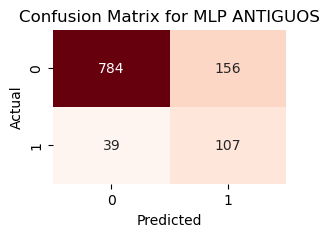

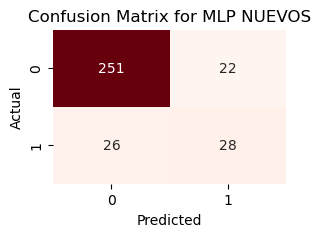

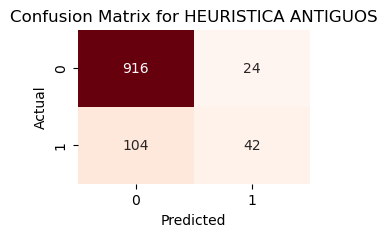

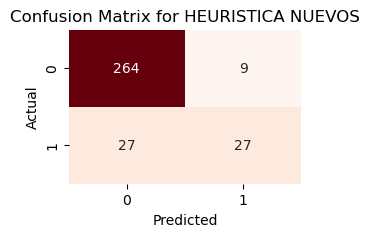

In [37]:
specificity_results = []
sensitivity_results = []

# Calcular especificidad y sensibilidad para cada modelo
for model, prediction, y in zip(models, predictions, ys):
    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    
    # Print confusion matrix
    cm = confusion_matrix(y, prediction)
    plot_confusion_matrix(cm, model)
    
    # Calcular especificidad y sensibilidad
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    # Agregar los resultados a las listas
    specificity_results.append(specificity)
    sensitivity_results.append(sensitivity)

# Crear un DataFrame con los resultados de especificidad
df_specificity = pd.DataFrame({'Model': models, 'Specificity': specificity_results})

# Crear un DataFrame con los resultados de sensibilidad
df_sensitivity = pd.DataFrame({'Model': models, 'Sensitivity': sensitivity_results})

In [38]:
print("Especificidad: (no best sellers clasificados correctamente)")
df_specificity

Especificidad: (no best sellers clasificados correctamente)


,Model,Specificity
0,MLP ANTIGUOS,0.834043
1,MLP NUEVOS,0.919414
2,HEURISTICA ANTIGUOS,0.974468
3,HEURISTICA NUEVOS,0.967033


In [39]:
print("Sensibilidad: (best sellers clasificados correctamente)")
df_sensitivity

Sensibilidad: (best sellers clasificados correctamente)


,Model,Sensitivity
0,MLP ANTIGUOS,0.732877
1,MLP NUEVOS,0.518519
2,HEURISTICA ANTIGUOS,0.287671
3,HEURISTICA NUEVOS,0.500000


**Comparación métricas modelos**

In [40]:
df_results = pd.merge(df_bal_acc, df_specificity)
df_results = pd.merge(df_results, df_sensitivity)
df_results

,Model,Balanced Accuracy,Specificity,Sensitivity
0,MLP ANTIGUOS,0.783460,0.834043,0.732877
1,MLP NUEVOS,0.718966,0.919414,0.518519
2,HEURISTICA ANTIGUOS,0.631070,0.974468,0.287671
3,HEURISTICA NUEVOS,0.733516,0.967033,0.500000


## Análisis por segmentos (géneros literarios)

In [41]:
# Función para calcular la sensibilidad
def sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

# Función para calcular la especificidad
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def balancedAccuracy(sen, esp):
    return (sen + esp) / 2

In [42]:
segmentos = ["Contemporary", "Romance", "Adult", "Mystery", "Thriller", "Resto"]

In [47]:
def evaluacionSegmentadaModelos(models, X_t, y_t, predictions):
    results = []

    for s in segmentos:
        if s == "Resto":
            filtro = ~(X_t[segmentos[:-1]] == 1).any(axis=1)
            X_test_segmentado = X_t[filtro]
        else:
            filtro = X_t[s] == 1
            X_test_segmentado = X_t[X_t[s] == 1]
        
        ys = y_t[X_test_segmentado.index]
        
        for i, model in enumerate(models):
        
            predictionsModel = predictions[i]
            preds = [predictionsModel[i] for i, x in enumerate(filtro) if x == 1]

            sen = sensitivity(ys, preds)
            esp = specificity(ys, preds)
            ba = balancedAccuracy(sen, esp)

            # Añade los resultados a la lista
            results.append({
                'Segmento': s,
                'Modelo': model,
                'Sensibilidad': sen,
                'Especificidad': esp,
                'Precisión balanceada': ba
            })

    df_results = pd.DataFrame(results)
    return df_results

df_evSegAntiguos = evaluacionSegmentadaModelos(["MLP (Datos antiguos)", "HEURÍSTICA (Datos antiguos)"], 
                                               X_scaled_test, y_test, [MLP_pred, HEURISTICA_pred_antiguas])

df_evSegNuevos = evaluacionSegmentadaModelos(["MLP (Datos nuevos)", "HEURÍSTICA (Datos nuevos)"], 
                                               XN_scaled_test, yN, [MLP_pred_reentreno, HEURISTICA_pred_nuevas])

In [56]:
import numpy as np

def plot_results(df_results, colors):
    # Agrupamos los datos por segmento y modelo
    grouped_results = df_results.groupby(['Segmento', 'Modelo'])

    # Obtenemos las métricas para cada segmento y modelo
    sensitivities = grouped_results['Sensibilidad'].mean().unstack()
    specificities = grouped_results['Especificidad'].mean().unstack()
    balanced_accuracies = grouped_results['Precisión balanceada'].mean().unstack()

    # Creamos un gráfico de barras para cada métrica
    segments = df_results['Segmento'].unique()
    models = df_results['Modelo'].unique()
    num_models = len(models)
    bar_width = 0.25
    index = np.arange(len(segments))

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Sensibilidad
    for i, model in enumerate(models):
        axs[0].bar(index + i * bar_width, sensitivities[model], bar_width, label=model, color=colors[i])

    axs[0].set_xlabel('Segmento')
    axs[0].set_ylabel('Sensibilidad')
    axs[0].set_title('Sensibilidad por Segmento y Modelo')
    axs[0].set_xticks(index + bar_width * (num_models - 1) / 2)
    axs[0].set_xticklabels(segments)
    axs[0].set_ylim(0, 1)
    axs[0].legend()

    # Especificidad
    for i, model in enumerate(models):
        axs[1].bar(index + i * bar_width, specificities[model], bar_width, label=model, color=colors[i])

    axs[1].set_xlabel('Segmento')
    axs[1].set_ylabel('Especificidad')
    axs[1].set_title('Especificidad por segmento y modelo')
    axs[1].set_xticks(index + bar_width * (num_models - 1) / 2)
    axs[1].set_xticklabels(segments)
    axs[1].set_ylim(0, 1)
    axs[1].legend()

    # Precisión balanceada
    for i, model in enumerate(models):
        axs[2].bar(index + i * bar_width, balanced_accuracies[model], bar_width, label=model, color=colors[i])

    axs[2].set_xlabel('Segmento')
    axs[2].set_ylabel('Precisión balanceada')
    axs[2].set_title('Balanced accuracy por segmento y modelo')
    axs[2].set_xticks(index + bar_width * (num_models - 1) / 2)
    axs[2].set_xticklabels(segments)
    axs[2].set_ylim(0, 1)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

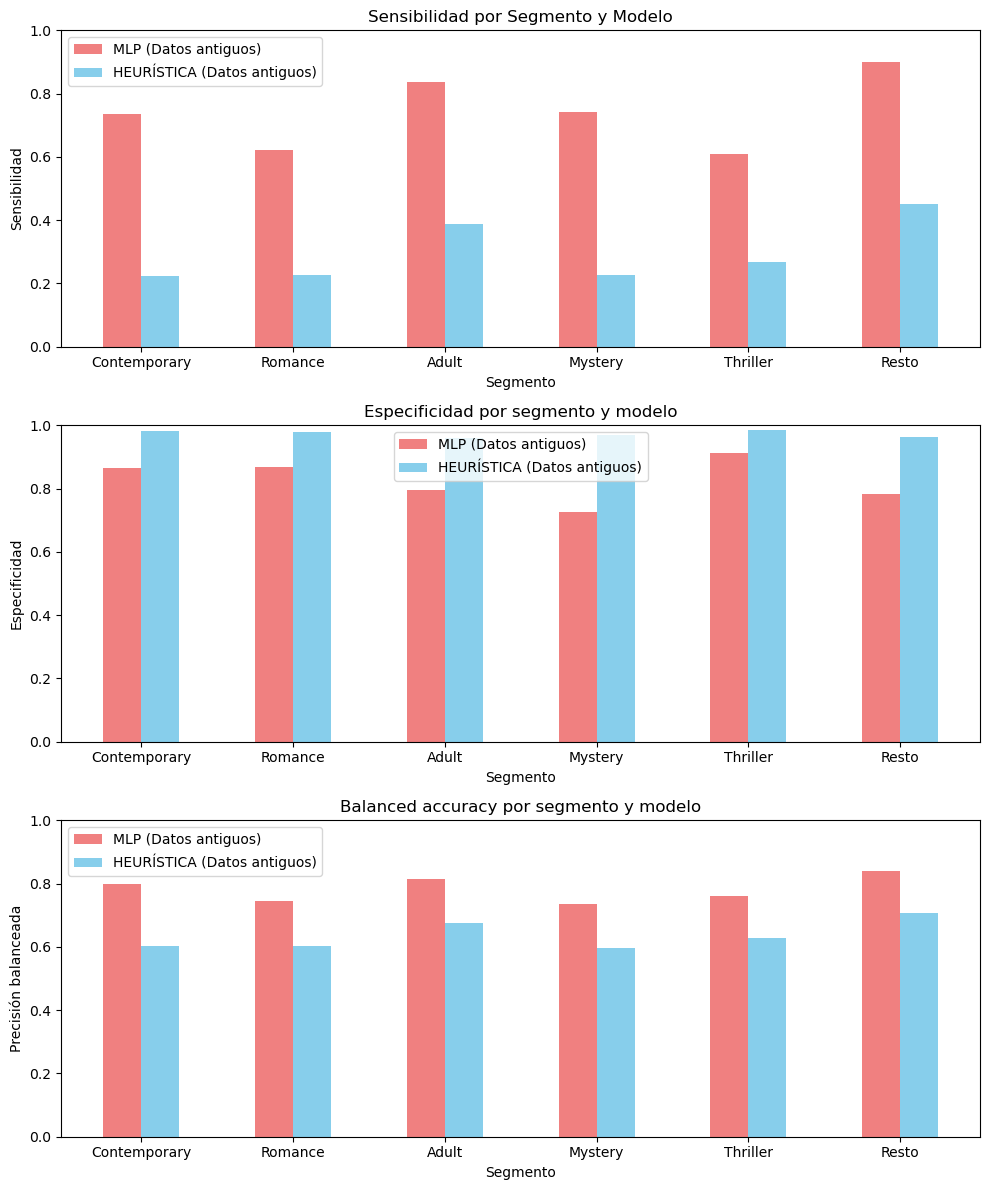

In [60]:
plot_results(df_evSegAntiguos, ['lightcoral', 'skyblue'])

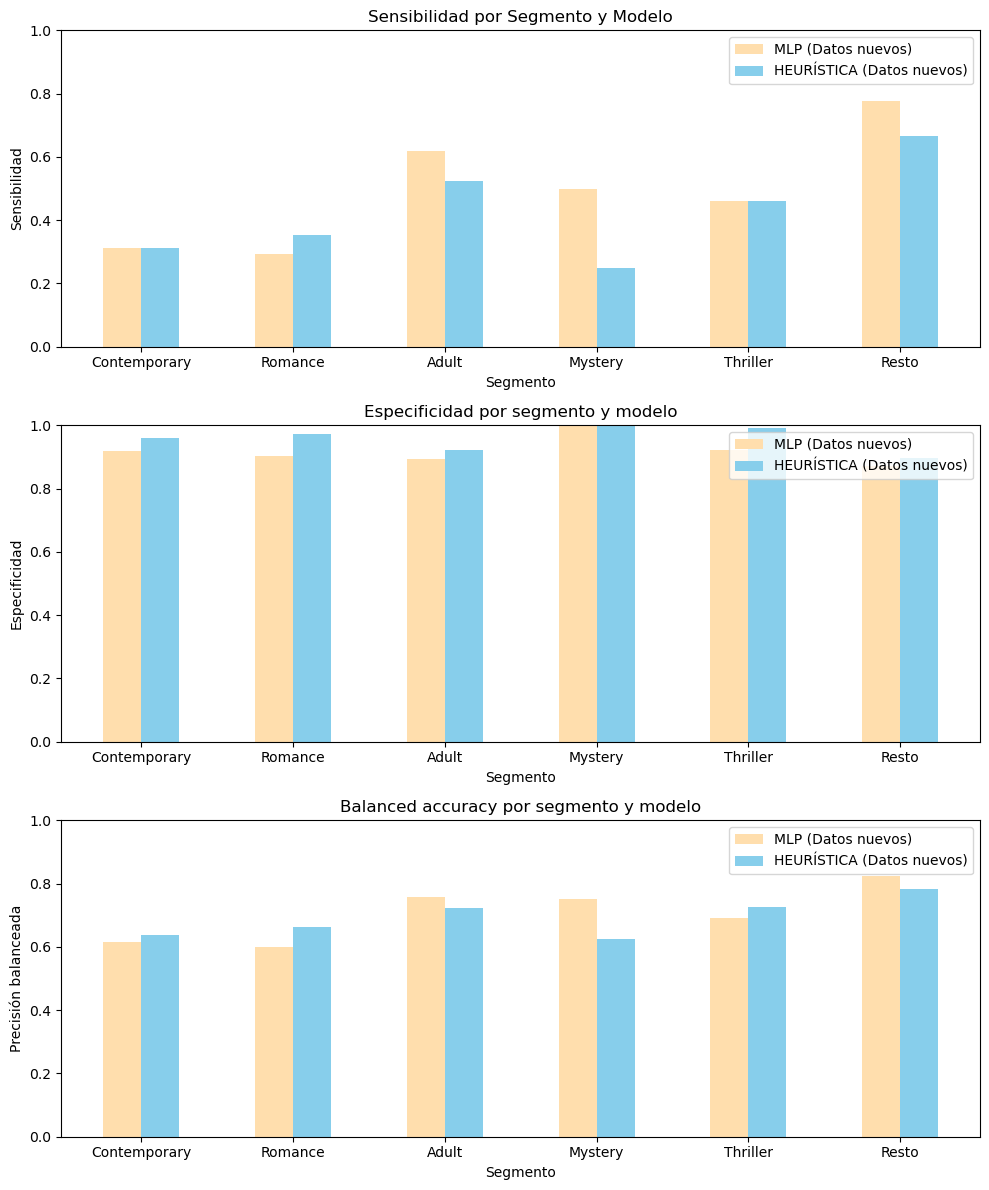

In [61]:
plot_results(df_evSegNuevos, ['navajowhite', 'skyblue'])

### Libros cuyo autor no tiene bestsellers previos

In [65]:
# Filtramos aquellos libros que no sean bestsellers
filtroNoBestsellers_antiguos = X_scaled_test["PrevBestSellAuthor"] == 0
filtroNoBestsellers_nuevos = XN_scaled_test["PrevBestSellAuthor"] == 0

X_nobest= X_scaled_test[filtroNoBestsellers_antiguos]
XN_nobest = XN_scaled_test[filtroNoBestsellers_nuevos]

# Seleccionar las filas correspondientes en y_TEST
y_nobest = y_test[filtroNoBestsellers_antiguos]
yN_nobest = yN[filtroNoBestsellers_nuevos]

MLP_pred_nb = MLP_model.predict(X_nobest)
MLP_pred_reentreno_nb = MLP_model_reentreno.predict(XN_nobest)
HEURISTICA_pred_antiguas_nb = prediccionesHeuristica(X_nobest)
HEURISTICA_pred_nuevas_nb = prediccionesHeuristica(XN_nobest)

In [66]:
MLP_pred_nb = MLP_model.predict(X_nobest)
MLP_pred_reentreno_nb = MLP_model_reentreno.predict(XN_nobest)
HEURISTICA_pred_antiguas_nb = prediccionesHeuristica(X_nobest)
HEURISTICA_pred_nuevas_nb = prediccionesHeuristica(XN_nobest)

In [69]:
# Calcula la sensibilidad y especificidad
def calcular_sensibilidad_especificidad(y_true, y_pred):
    # Calcular la sensibilidad
    sensibilidad = sensitivity(y_true, y_pred)
    
    # Calcular la especificidad
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    especificidad = tn / (tn + fp)
    
    return sensibilidad, especificidad

# Calcular balanced accuracy score
def calcular_balanced_accuracy(y_true, y_pred):
    return balanced_accuracy_score(y_true, y_pred)

# Calcular sensibilidad y especificidad para los modelos MLP y Heurística
sensibilidad_MLP_nb, especificidad_MLP_nb = calcular_sensibilidad_especificidad(y_nobest, MLP_pred_nb)
sensibilidad_MLP_reentreno_nb, especificidad_MLP_reentreno_nb = calcular_sensibilidad_especificidad(yN_nobest, MLP_pred_reentreno_nb)
sensibilidad_HEURISTICA_antiguas_nb, especificidad_HEURISTICA_antiguas_nb = calcular_sensibilidad_especificidad(y_nobest, HEURISTICA_pred_antiguas_nb)
sensibilidad_HEURISTICA_nuevas_nb, especificidad_HEURISTICA_nuevas_nb = calcular_sensibilidad_especificidad(yN_nobest, HEURISTICA_pred_nuevas_nb)

# Calcular balanced accuracy score para los modelos MLP y Heurística
balanced_accuracy_MLP_nb = calcular_balanced_accuracy(y_nobest, MLP_pred_nb)
balanced_accuracy_MLP_reentreno_nb = calcular_balanced_accuracy(yN_nobest, MLP_pred_reentreno_nb)
balanced_accuracy_HEURISTICA_antiguas_nb = calcular_balanced_accuracy(y_nobest, HEURISTICA_pred_antiguas_nb)
balanced_accuracy_HEURISTICA_nuevas_nb = calcular_balanced_accuracy(yN_nobest, HEURISTICA_pred_nuevas_nb)

# Crear el DataFrame
import pandas as pd

data = {
    'Modelo': ['MLP', 'MLP con reentrenamiento', 'Heurística (antiguas)', 'Heurística (nuevas)'],
    'Sensibilidad': [sensibilidad_MLP_nb, sensibilidad_MLP_reentreno_nb, sensibilidad_HEURISTICA_antiguas_nb, sensibilidad_HEURISTICA_nuevas_nb],
    'Especificidad': [especificidad_MLP_nb, especificidad_MLP_reentreno_nb, especificidad_HEURISTICA_antiguas_nb, especificidad_HEURISTICA_nuevas_nb],
    'Balanced Accuracy': [balanced_accuracy_MLP_nb, balanced_accuracy_MLP_reentreno_nb, balanced_accuracy_HEURISTICA_antiguas_nb, balanced_accuracy_HEURISTICA_nuevas_nb]
}

df_resultados = pd.DataFrame(data)

# Mostrar el DataFrame
df_resultados


,Modelo,Sensibilidad,Especificidad,Balanced Accuracy
0,MLP,0.653846,0.844978,0.749412
1,MLP con reentrenamiento,0.222222,0.928030,0.575126
2,Heurística (antiguas),0.000000,1.000000,0.500000
3,Heurística (nuevas),0.000000,1.000000,0.500000
